#### CNN (Convolutional Neural Network)
-------------------------------------
神經網路成功因素
1. 複雜軟體
2. 電腦計算能力
3. 大量數據  
##### CNN最厲害：圖形辨識

#### 有兩種隱藏層
1. convolutional layer 沒有fully connected且使其資料變大
2. Max-Pooling layer 每區選出最大的
3. 之後可以不斷重複convolution, max-pooling, convolution, max-pooling, convolution, max-pooling
4. filters 是不斷增加的

In [1]:
%env KERAS_BACKEND = tensorflow

env: KERAS_BACKEND=tensorflow


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from keras.datasets import mnist

In [4]:
(x_train,y_train), (x_test, y_test) = mnist.load_data()

CNN 格式為矩陣所以不用拉平

In [5]:
x_train = x_train.reshape(60000, 28, 28, 1) #最後 1 是只有一個顏色也就是channel 
x_test = x_test.reshape(10000, 28, 28, 1)

In [6]:
x_train[9487].shape

(28, 28, 1)

In [7]:
X = x_train[9487][:, :, 0]

In [8]:
X

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 240,
        253, 165,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32, 241,
        252, 252,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

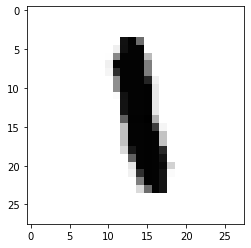

In [9]:
plt.imshow(X, cmap = 'Greys')

In [10]:
from keras.utils import np_utils

In [11]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

 - 做三次convolution, max-pooling 
 - filters = 3x3, max-pooling = 2x2  
 -----------------------------------
 CNN 一個小技巧是每層filters 數目越來越多, 做完convolution 要拉平送入標準神經網路
 - 一個隱藏層, 200神經元

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD

In [13]:
model = Sequential()

In [14]:
model.add(Conv2D(32,(3, 3), padding = 'same', input_shape = (28, 28,1))) #padding = 'same'輸出與之前一樣
model.add(Activation('relu'))

In [15]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [16]:
model.add(Conv2D(64,(3, 3), padding = 'same')) #第二次input_shape不用再打出來,且filters 會越精細
model.add(Activation('relu'))

In [17]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [18]:
model.add(Conv2D(128,(3, 3), padding = 'same')) #第二次input_shape不用再打出來,且filters 會越精細
model.add(Activation('relu'))

In [19]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [20]:
model.add(Flatten())
model.add(Dense(200))
model.add(Activation('relu'))

In [21]:
model.add(Dense(10))  #輸出為10 
model.add(Activation('softmax'))

In [22]:
model.compile(loss = 'mse', optimizer = SGD(learning_rate = 0.05), metrics = ['accuracy']) #進行組裝

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D  (None, 14, 14, 32)        0         
)                                                                
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)          0         
2D)                                                     

In [24]:
#320

(3*3+1)*32

320

In [32]:
model.fit(x_train, y_train, batch_size = 100, epochs = 12)

Epoch 1/12
 92/600 [===>..........................] - ETA: 1:08 - loss: 0.1793 - accuracy: 0.1035

KeyboardInterrupt: 

In [26]:
score = model.evaluate(x_test, y_test)

313/313 [==============================] - 7s 20ms/step - loss: 0.1798 - accuracy: 0.1009


In [27]:
print('lose:', score[0])
print('acc:', score[1])

lose: 0.17982004582881927
acc: 0.10090000182390213


In [28]:
model_json = model.to_json()
open('手寫辨識CNN.json', 'w').write(model_json)
model.save_weights('手寫辨識CNN.h5')

In [30]:
predict = model.predict(x_test)
predict = np.argmax(predict,axis = 1)

#原因很简单，两次训练时，网络结构不同。
#第一次用的网络是在model=Sequential()下添加模块的的方法，也就是所谓的顺序模型。
#Sequential class可以使用model.predict_classes()的方法来实现预测；
#第二次用的方法，是编写好网络结构后使用model=Model()综合起来的方法，也就是Model class，无法使用model.predict_classes()
#但是可以使用组合形式预测



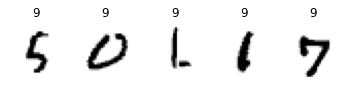

In [31]:
pick = np.random.randint(1, 9999, 5)
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[pick[i]].reshape(28, 28), cmap = 'Greys')
    plt.title(predict[pick[i]])
    plt.axis('off')